In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Family']=df['SibSp'] + df['Parch']
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [6]:
df.Family.describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [7]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [8]:
# Based on the categorise,we will analyze which category people were more likely to survive
## Low, Mid, Mid;High, High
df['Fare_Category'] = pd.cut(df.Fare, bins=[0,7.9,14.45,31.00,512],
                            labels=['Low','Mid','Mid-High','High'])
df['Fare_Category'].head()

0     Low
1    High
2     Mid
3    High
4     Mid
Name: Fare_Category, dtype: category
Categories (4, object): [Low < Mid < Mid-High < High]

In [9]:
# Comparing the Fare with fare category
df[['Fare','Fare_Category']]

,Fare,Fare_Category
0,7.2500,Low
1,71.2833,High
2,7.9250,Mid
3,53.1000,High
4,8.0500,Mid
...,...,...
886,13.0000,Mid
887,30.0000,Mid-High
888,23.4500,Mid-High
889,30.0000,Mid-High


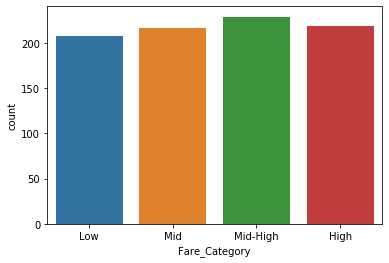

In [10]:
## visualize the Fare Category
## Countplot give you entire count of a category-->categories of survived and Deceased
sns.countplot(x='Fare_Category',data= df)

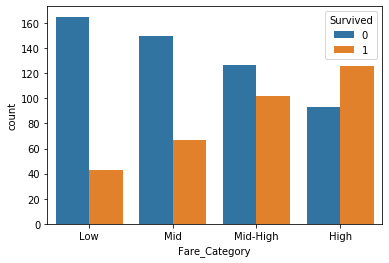

In [11]:
## Visualizing the count of categories based on Survived
sns.countplot(x='Fare_Category',hue='Survived',data= df)

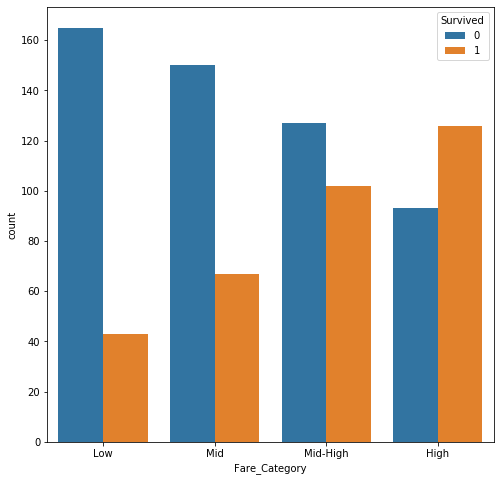

In [12]:
## Visualizing the count of categories based on Survived
## increse the size
plt.figure(figsize=(8,8))
sns.countplot(x='Fare_Category',hue='Survived',data= df)

Text(0.5, 1.0, 'Survived based on Fare Category')

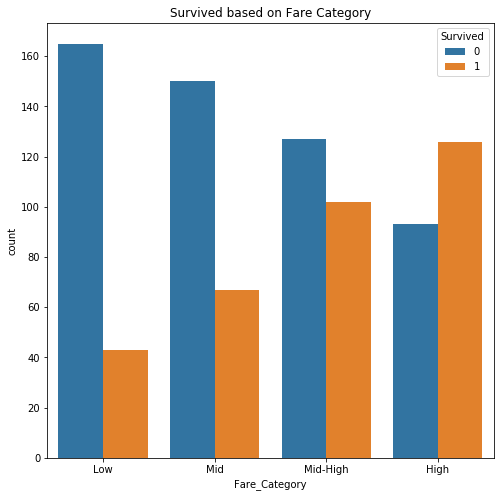

In [13]:
## Visualizing the count of categories based on Survived
## increse the size
plt.figure(figsize=(8,8))
sns.countplot(x='Fare_Category',hue='Survived',data= df).\
               set_title("Survived based on Fare Category")

In [14]:
df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [15]:
## Embarked :port-->from which the passengerhad boarded the skip
df.Embarked.value_counts() # Out of 100% passengers,which port has taken 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

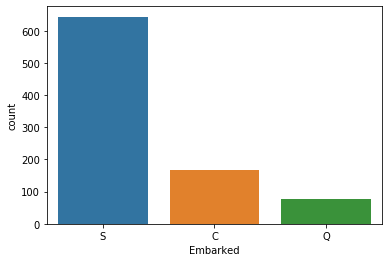

In [16]:
## Visulizing the port column
sns.countplot(x='Embarked',data =df)

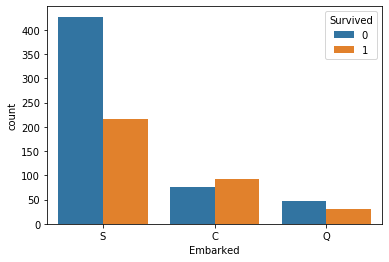

In [17]:
## Visulizing the port column
sns.countplot(x='Embarked',hue='Survived',data =df)

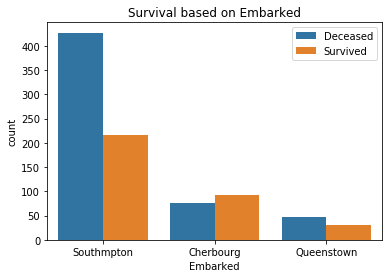

In [18]:
## Visulizing the port column
p=sns.countplot(x='Embarked',hue='Survived',data =df)
p.set_xticklabels(['Southmpton','Cherbourg','Queenstown'])
p.set_title('Survival based on Embarked')
p.legend(labels=['Deceased','Survived'])#

## Imputing with Missing values

In [19]:
# imputing with missing value
df.isnull().mean().sort_values(ascending=False)

Cabin            0.771044
Age              0.198653
Fare_Category    0.020202
Embarked         0.002245
Family           0.000000
Fare             0.000000
Ticket           0.000000
Parch            0.000000
SibSp            0.000000
Sex              0.000000
Name             0.000000
Pclass           0.000000
Survived         0.000000
PassengerId      0.000000
dtype: float64

In [20]:
df.Cabin.describe

<bound method NDFrame.describe of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

In [21]:
## Cabin-->77% missing values we are going to create a new category as Na
df.Cabin.fillna('Na',inplace=True)
df.Cabin.isnull().sum()

0

In [22]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [23]:
# Median--->sorting in the order(middle value) NaN in the age column should be 
# substituted with median of age
df.Age.fillna(df.Age.median(),inplace=True)


In [24]:
df.Age.isnull().sum()

0

In [25]:
## Imputing the Embarked column--> Mode Imputation
df.Embarked.fillna(df.Embarked.mode()[0],inplace=True)

In [26]:
df.Embarked.isnull().sum()

0

In [27]:
##  imputing the Fare Category
df.Fare_Category.fillna(df.Fare_Category.mode()[0],inplace=True)
df.Fare_Category.isnull().sum()

0

In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Family           0
Fare_Category    0
dtype: int64

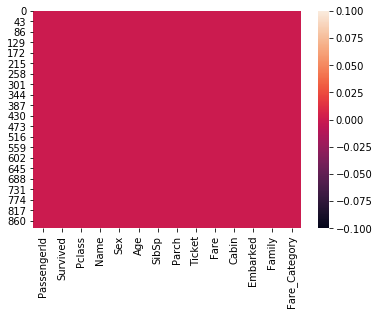

In [29]:
sns.heatmap(df.isnull())

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Na,S,1,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Na,S,0,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Na,S,0,Mid


In [31]:
df['Age-Range']=pd.cut(df.Age,[0,10,20,30,40,60,80])
df[['Age','Age-Range']].head()

,Age,Age-Range
0,22.0,"(20, 30]"
1,38.0,"(30, 40]"
2,26.0,"(20, 30]"
3,35.0,"(30, 40]"
4,35.0,"(30, 40]"


In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Fare_Category,Age-Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Na,S,1,Low,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,High,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Na,S,0,Mid,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,High,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Na,S,0,Mid,"(30, 40]"


## Encoding of Categorical Variables/Column

In [33]:
df=pd.concat([df,pd.get_dummies(df.Cabin,prefix='Cabin',drop_first=True),
                 pd.get_dummies(df.Embarked,prefix='Emb',drop_first=True),
                 pd.get_dummies(df.Fare_Category,prefix='Fare',drop_first=True),
                 pd.get_dummies(df['Age-Range'],drop_first=True)],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


In [34]:
#LabelEnoder-->0,1,2,3,4...(how many vategories are present in the column that many numbers we will get)
#OneHotEncoder--> it will create dummy columns for each and every category
                

In [35]:
## Encoding the sex Column
from sklearn.preprocessing import LabelEncoder
df['Sex']=LabelEncoder().fit_transform(df.Sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,1,0,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0,1,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0,1,1,0,0,0,0,1,0,0


In [36]:
df.columns

Index([  'PassengerId',      'Survived',        'Pclass',          'Name',
                 'Sex',           'Age',         'SibSp',         'Parch',
              'Ticket',          'Fare',
       ...
               'Emb_Q',         'Emb_S',      'Fare_Mid', 'Fare_Mid-High',
           'Fare_High',        (10, 20],        (20, 30],        (30, 40],
              (40, 60],        (60, 80]],
      dtype='object', length=172)

In [37]:
# Drop the unnecessary columns
df.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Embarked',
         'Fare_Category','Cabin','Age-Range'],axis=1,inplace=True)
df.shape

(891, 161)

In [38]:
df.head()

,Survived,Pclass,Sex,Family,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0


In [39]:
df.dtypes

Survived     int64
Pclass       int64
Sex          int32
Family       int64
Cabin_A14    uint8
             ...  
(10, 20]     uint8
(20, 30]     uint8
(30, 40]     uint8
(40, 60]     uint8
(60, 80]     uint8
Length: 161, dtype: object

In [40]:
## StandardScaler-- not required for this(DistanceBased Algorithm)

In [41]:
## 
x=df.drop('Survived',axis=1)
x.shape

(891, 160)

In [42]:
## output column
y=df.iloc[:,0]
y.shape

(891,)

In [43]:
## Input and Output into training data and testing data
## Training --->we will be training the model on trainning data
## testing---> check the perfomance of the model
## 891-->out of 891,75% of 891 rows will be in training dataset and 25% of rows
##   will be in testing data

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=23)


In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 160)
(223, 160)
(668,)
(223,)


In [46]:
x_train # Input Train

,Pclass,Sex,Family,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
91,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
114,3,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
657,3,0,2,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
778,3,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
146,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
488,3,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
40,3,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
742,1,0,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [47]:
y_train # output of X_train
## Training dataset and testing--> 100 rows in a dataset(Out of 100, 70 rows
# into training data-random, 30 rows into test data)

91     0
114    0
657    0
778    0
146    1
      ..
31     1
488    0
40     0
742    1
595    0
Name: Survived, Length: 668, dtype: int64

In [48]:
x_test

,Pclass,Sex,Family,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
727,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
668,3,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
210,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
654,3,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
228,2,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
341,1,0,5,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
421,3,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
434,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [49]:
y_test

727    1
668    0
210    0
654    0
228    0
      ..
152    0
341    1
421    0
434    0
889    1
Name: Survived, Length: 223, dtype: int64

In [50]:
## To check the default number of rows displayed
pd.get_option('display.max_rows')

60

In [68]:
## To display all the columns in the data frame, 
## we have to use set_option dislay.max_columns to be set to 
## None(None means unlimited) 
pd.set_option('display.max_columns',None) # In place of None if given as 50, it will display on the 50 columns

In [69]:
df

,Survived,Pclass,Sex,Family,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B41,Cabin_B42,Cabin_B49,Cabin_B5,Cabin_B50,Cabin_B51 B53 B55,Cabin_B57 B59 B63 B66,Cabin_B58 B60,Cabin_B69,Cabin_B71,Cabin_B73,Cabin_B77,Cabin_B78,Cabin_B79,Cabin_B80,Cabin_B82 B84,Cabin_B86,Cabin_B94,Cabin_B96 B98,Cabin_C101,Cabin_C103,Cabin_C104,Cabin_C106,Cabin_C110,Cabin_C111,Cabin_C118,Cabin_C123,Cabin_C124,Cabin_C125,Cabin_C126,Cabin_C128,Cabin_C148,Cabin_C2,Cabin_C22 C26,Cabin_C23 C25 C27,Cabin_C30,Cabin_C32,Cabin_C45,Cabin_C46,Cabin_C47,Cabin_C49,Cabin_C50,Cabin_C52,Cabin_C54,Cabin_C62 C64,Cabin_C65,Cabin_C68,Cabin_C7,Cabin_C70,Cabin_C78,Cabin_C82,Cabin_C83,Cabin_C85,Cabin_C86,Cabin_C87,Cabin_C90,Cabin_C91,Cabin_C92,Cabin_C93,Cabin_C95,Cabin_C99,Cabin_D,Cabin_D10 D12,Cabin_D11,Cabin_D15,Cabin_D17,Cabin_D19,Cabin_D20,Cabin_D21,Cabin_D26,Cabin_D28,Cabin_D30,Cabin_D33,Cabin_D35,Cabin_D36,Cabin_D37,Cabin_D45,Cabin_D46,Cabin_D47,Cabin_D48,Cabin_D49,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_Na,Cabin_T,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [66]:
# Reset to the previous mode
pd.reset_option('display.max_columns')

In [67]:
df

,Survived,Pclass,Sex,Family,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,...,Emb_Q,Emb_S,Fare_Mid,Fare_Mid-High,Fare_High,"(10, 20]","(20, 30]","(30, 40]","(40, 60]","(60, 80]"
0,0,3,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,0,3,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
887,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
888,0,3,0,3,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
889,1,1,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


### For Classification: we are classifying whether the passenger is survived or not Logistic Regression:

In [54]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # creating an object for Logistic Regression

Dataset is of 100%--891 rows

- 891 rows--- 2 parts
   - training data(subset of original data)(800 rows, we have in training data)
       - We will build the model on training data
   - testing data(subset of our original data)(91 rows, we will test the model performance on 91 rows)

In [55]:
## We have to apply this object(log_reg) to the training data
log_reg.fit(x_train, y_train) # with help of fit method we are fitting the 
                            ##Logistic Regression on training data
## objectName.fit(InputData, OutputData)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Instead of directly predicting on test data, let us see how well the model predicts the training data



In [56]:
## Predicting on the training data
## Syntax: objectName.predict(TrainInput)
y_train_pred = log_reg.predict(x_train)

- y_train--> original output
- y_train_pred--> model predicted output

In [57]:
y_train ==y_train_pred  # comparing original data output and model predicted output

91      True
114    False
657    False
778     True
146    False
       ...  
31      True
488     True
40     False
742     True
595     True
Name: Survived, Length: 668, dtype: bool

In [58]:
## accuracy_score---> With help of this metric, we can evaluate the overall 
## performance of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.844311377245509

In [59]:
## Performance Metrics---> To evaluate the model is predicting

In [60]:
## Predict the model on Test:
y_test_pred = log_reg.predict(x_test)
y_test_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [61]:
y_test==y_test_pred

727     True
668     True
210     True
654    False
228     True
       ...  
152     True
341     True
421     True
434     True
889     True
Name: Survived, Length: 223, dtype: bool

In [62]:
## accuracy of the test data(Original test data output and the model predicted 
## output)
accuracy_score(y_test, y_test_pred)

0.7847533632286996

In [63]:
## For training data-- we got an accuracy of 84%
## For testing data-- we got an accuracy of 77%  
##(Example:Instead of 77% if I got 34% as accuracy)